<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>

### ***Name***: [*your name goes here*]
### ***CID***: [*your CID goes here*]

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine. Your copy of the notebook should be named: `yourusername_coursework_II.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, outputs of calculations, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step in the coding cells.

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 16 December at 14:00h UK time**, and the answers have to be submitted by **Friday 16 December, 17:00h UK time**. We will not accept late submissions.

4. If you have questions during the coursework, come to me directly and I will address them. Usually, they will be relevant to the rest of the students and if this is the case, I will answer them for everybody. **DO NOT ask questions in the chat as this may give answers away to other students, if you prefer to, send the questions via chat to me privately, but do not use any of the general chats please.**

<br>

<br>

### The coursework consists of 8 questions you have to complete. You will find them below. 

- This is an open-book assessment, so feel free to browse the materials we have seen in the module to assist you with your answers.

<br>

---

<br>

In [1]:
## provided imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import CelebA
from torchvision.transforms import Compose, Resize, ToTensor
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

device='cpu'

## **Question 1** [10 points]

Suppose we have a feed-forward network (FFN) designed to predict which class an image belongs to. Given the following architecture and input characteristics:

- Images are single channel and have a size of 100x105.
- The FFN has 4 hidden layers with 1001, 2002, 1345, and 1002 output nodes (output size of each layer).
- The FFN output size is 10 nodes.
- There are bias terms everywhere.
- The activation function in all layers except the output layer are ReLU.

Answer the following questions:
#### **1.1** Implement this network as an nn.Module.

In [5]:
class FFNq1(nn.Module):
    def __init__(self):
        super(FFNq1,self).__init__()
        self.linear1 = nn.Linear(10500,1001, bias=True)
        self.linear2 = nn.Linear(1001,2002, bias=True)
        self.linear3 = nn.Linear(2002, 1345, bias=True)
        self.linear4 = nn.Linear(1345, 1002, bias=True)
        self.output = nn.Linear(1002, 10, bias=True)
        self.relu = nn.ReLU()
    def forward(self, input):
        ### your code here
        input = self.linear1(input)
        input = self.relu(input)
        input = self.linear2(input)
        input = self.relu(input)
        input = self.linear3(input)
        input = self.relu(input)
        input = self.linear4(input)
        input = self.relu(input)
        output = self.output(input)
        return output

#### **1.2** How many trainable parameters does the network have? Use a code block to calculate it and explain the process (where you get all the numbers you multiply and add to find the answer) in comments or in a markdown block.

Calculate the solution explicitly. If you want to use `torchsummary`, that's ok, **but only use it to validate that your answer is correct**. You will be assessed on the explicit calculation only.

In [3]:
print('The network has', (10500*1001+1001)+(1001*2002+2002) + (2002*1345+1345) + (1345*1002+1002) +(1002*10+10), 'parameters')

The network has 16570262 parameters


In FFN, the info come from the input nodes, through the hidden nodes and to the output nodes. 
I make a multiple between the nodes for each nodes connect and add the bias for each layer.
After calculating the number of parameters for each layers,I make a sum which is the solution.

#### **1.3** How would you compute the loss? Get an instance of the loss you would use (call it `criterion`) and explain what are the operations that this loss performs on the outputs.



In [4]:
criterion = nn.MSELoss()

The loss fuction help us know if there is any correction during the learning process.

We should use the cross-entropy loss for this multi-class classification.
We use it to calculate the difference between predicted and true probability distribution. And our goal is to make it as closer as possible.

![image.png](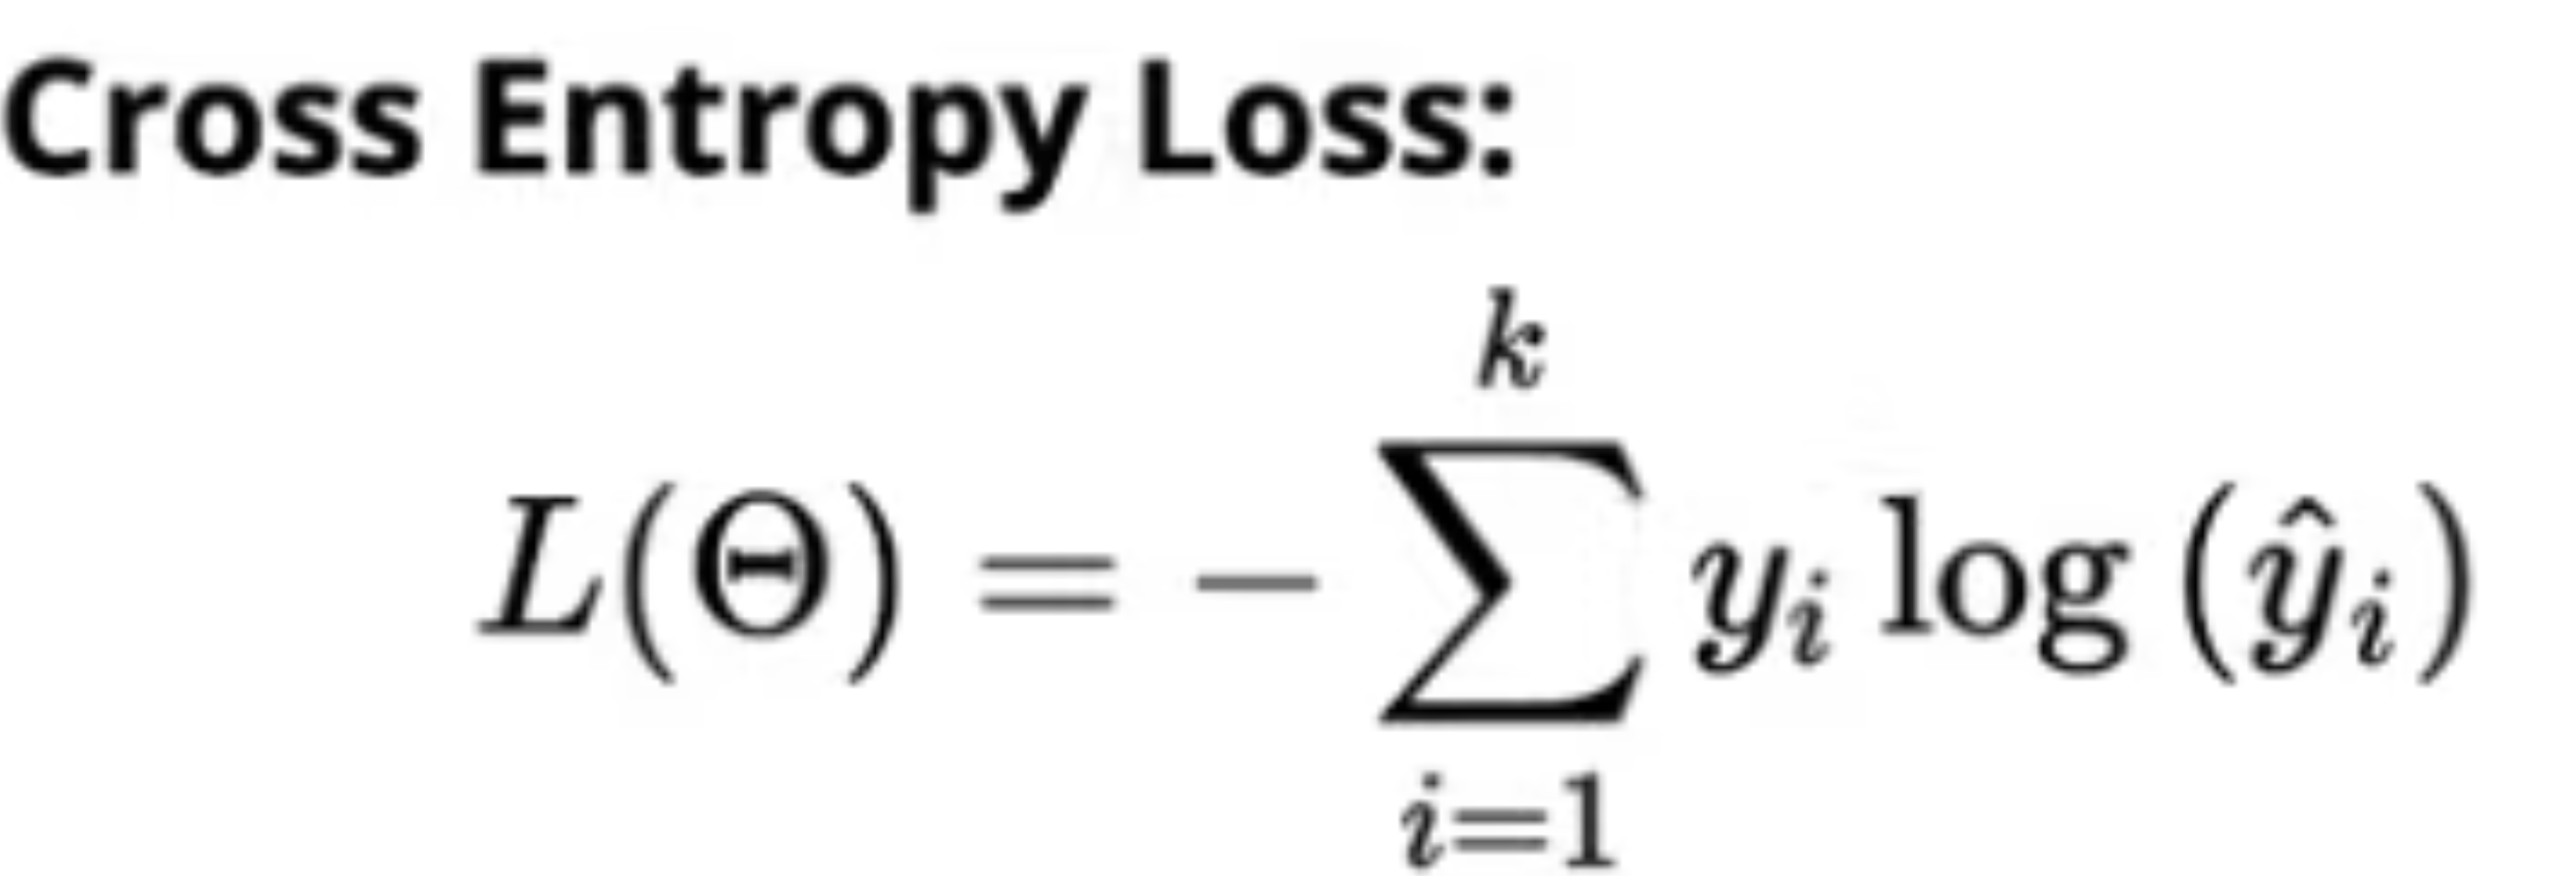)

#### **1.4** How do you make predictions once the network is trained?

To clarify the question: how do you decide the class of a new image based on the output of the network?

If we want to train a classficaion，the last layer to should be softmax(). The
output is the probability of each class(between 0 and 1), which the sum of probabilities will be 1. 

The class which has the biggest probability will be chosen as the prediction.



\\

---

\\

## **Question 2** [10 points]

Suppose we have a convolutional neural network (CNN). Given the following architecture and input characteristics:

- Images have three channels, each with size 48x48
- The `nn.Module` of the network is:

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.c1 = nn.Conv2d(3, 12, kernel_size=3, stride=1, padding=1) 
    self.s2 = nn.MaxPool2d(kernel_size=2, stride=2)               
    self.c3 = nn.Conv2d(12, 24, kernel_size=3, stride=1, padding=1)           
    self.s4 = nn.MaxPool2d(kernel_size=2, stride=2)               
    self.c5 = nn.Conv2d(24, 1, kernel_size=3, stride=1, padding=1)                           
    self.act = nn.ReLU()                                          
    
  def forward(self, x):
    x = self.act(self.c1(x))                                      
    x = self.act(self.s2(x))                                      
    x = self.act(self.c3(x))                                     
    x = self.act(self.s4(x))                                     
    x = self.c5(x)
    return x                                         

Answer the following questions:

#### **2.1** How many trainable parameters does this network have?

Calculate the solution explicitly. If you want to use `torchsummary`, that's ok, **but only use it to validate that your answer is correct**. You will be assessed on the explicit calculation only.

In [7]:
### your code here
print('The network has', ((9+1)*12)+((9+1)*24)+((9+1)*1), 'parameters')

The network has 370 parameters


your answers here

#### **2.2** Does the number of trainable parameters you have calculated depends on the size of the input?

Provide a short explanation of your answer (one or two sentences)

In [ ]:
### your code (if you need it) here


NO,it doesn't.
Input size is not related to the size of input.
THe number of kernel is made, and this one is related to the number of trainable parameters.


\\

---

\\

## **Question 3** [10 points]

Given a dataset with 10000 samples, answer the following questions:

#### **3.1** The dataset is split in three: training dataset (80%), validation dataset (10%), and test dataset (10%). Which one of these statements is incorrect? Explain in one sentence why it is incorrect (don't need to explain the two that are correct).

- a) The training dataset is used to update the model parameters, but not the hyperparameters.
- b) The validation dataset is used to optimise hyperparameters, and after this is done, we can combine it with the training set for a final training with hyperparameters fixed.
- c) The test dataset that will be used to assess generalisation can also be used to optimise hyperparameters, but not for training weights and biases.







Answers (select one option in each case and explain the one that is False):
- a) True/False TRUE
- b) True/False FALSE(?) LOSS
- c) True/False TRUE

#### **3.2** How many iterations (model updates) will I have done in total if I train the network using the training dataset for 200 epochs?

- i) Full-batch gradient descent
- ii) Mini-batch gradient descent with a batch size of 99
- iii) Pure stochastic gradient descent (batch size of 1)

In [8]:
### Answers
total_num_iterations_i = 200
total_num_iterations_ii = 11 * 200
total_num_iterations_iii = 200 * 8000

#### **3.3** If the dataset is composed of images with three channels and 50x50 dimensions per channel and they are used as the input of a CNN where the first layer produces 25 feature maps of size 50x50 each. What would be the effect on the feature maps after applying a `nn.Dropout(0.2)` layer? And if we use `nn.Dropout2d(0.2)` layer instead?






In [ ]:
### your code (if you need it) here

Dropout is for avoiding the overfitting. 
Dropout is for single tentor to 0.
Dropout2d is change the whole channel to 0.
When we use cnn is to high dimentional ,not every channel is useful, so we can add dropout.


\\

---

\\

## **Question 4** [15 points]

#### Given the network we used in class to illustrate how backpropagation works:

<br>

<center><img src="https://drive.google.com/uc?id=1YT8y2gqkDsrwbNyi0Lmo3YSHh3kcrf6H" width="600"/></center>

[link to the figure](https://drive.google.com/file/d/1YT8y2gqkDsrwbNyi0Lmo3YSHh3kcrf6H/view?usp=share_link) in case you cannot see it in the notebook.

<br>

#### Continue the derivation we saw in class to calculate the expression for the gradient of $w_1$:

<br>

$$\frac{\partial C}{\partial w_1}$$
 
#### where

$$C = \frac{1}{2}(a_4-y)^2$$

<br>

#### and assume that the activation function $g$ is now a sigmoid function $\sigma$. Choose what is the correct expression for the gradient of $w_1$ from the list below:

<br>

- a) $(a_4 -y)\;\sigma(z_4)\;(1-\sigma(z_4))\;w_3\; \sigma(z_3)\;(1-\sigma(z_3))\; w_2 \;\sigma(z_2)\;(1-\sigma(z_2))\; a_1$

- b) $(a_4 -y)\;\sigma(z_4)\;(1-\sigma(z_4))\;w_3\; \sigma(z_3)\;(1-\sigma(z_3))\; a_2 \;\sigma(z_2)\;(1-\sigma(z_2))\; a_1$

- c) $(a_4 -y)\;\sigma(z_4)\;w_3\; \sigma(z_3)\; w_2 \;\sigma(z_2)\; a_1$

- d) $(a_4 -y)\;\sigma(z_4)\;w_3\; \sigma(z_3)\; w_2 \;\sigma(z_2)\; w_1$

- e) *none of the above*

your answer here (pick an option and explain why it is the correct one). You don't have to add any mathematical derivation.

A should be correct.

\\

---

\\

## **Question 5** [10 points]

Identify and briefly explain the errors in the following code snippets:

#### **5.1** The following network implementation is designed to take 1-channel two-dimensional inputs (1-chanel images) and classify them into 6 different classes. The code below has 4 errors. Find them and correct them so that you can run your network with a dummy input (code provided at the end of the cell). Indicate with comments in the code where you have made your changes:

***\[ you don't need to add any additional blocks in this question (5.1), only use the code block to make your changes and add comments on it\]***

In [ ]:
class NetworkQ5(nn.Module):
    def __init__(self):
        super(NetworkQ5, self).__init__()

        self.c1 = nn.Conv2d(1, 12, kernel_size=5, stride=1, padding=2) #3d to 2d
        self.s2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.s2_dr = nn.Dropout2d(p=0.2)
        self.c3 = nn.Conv2d(12, 32, kernel_size=5, stride=1)
        self.c3_bn = nn.BatchNorm2d(32) #12 to 32
        self.s4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.c5 = nn.Linear(800, 120) #900 t0 800
        self.f6 = nn.Linear(120, 84)
        self.output = nn.Linear(84, 6) #5 to 6
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.c1(x))

        x = self.act(self.s2_dr(self.s2(x)))


        x = self.act(self.c3(x))

        x = self.c3_bn(x)

        x = self.act(self.s4(x))

        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))

        x = self.act(self.c5(x))

        x = self.act(self.f6(x))
      
        return self.output(x)

#### **5.2** The following training loop has 3 errors. Identify and fix them.

**This code snippet is not designed to be executed, it will not run**. The question is: what are the three conceptual errors in this training loop. Identify them in the code and add a comment next to their corresponding lines, and explain in the markdown block below why you think they are errors. You can assume that the following objects exist and you can use them: `data_loader`, `model`, `device`, `criterion`, and `optimizer`. Once you have identified them, fix them.

In [9]:
for epoch in range(10):  

    running_loss = 0.0
    # model.eval() to model.train(
    for X, y in data_loader:
        #with torch.no_grad():
        X, y = X.to(device), y.to(device)
        output = model(X)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        # optimizer.zero_grad()
        optimizer.step()

NameError: ignored

your answers here

<br>

---

<br>

## **Question 6** [15 points]

Given an RNN, with a single layer, that has been trained and is used to generate new outputs, like the one in the figure below:

<center><img src="https://drive.google.com/uc?id=1GmEyTghDKdkBx0gbFrw_KOn6zuKbNaHc" width="500"/></center> 

[link to the figure](https://drive.google.com/file/d/1GmEyTghDKdkBx0gbFrw_KOn6zuKbNaHc/view?usp=share_link) in case you cannot see it in the notebook.

<br>

If the dimension of my hidden vector is 20, and the dimension of my input and output is 35.

#### **Q6.1** What are the sizes of the matrices $W_{hh}$, $W_{xh}$ and $W_{hy}$? Use the next text block to write your answers:


$W_{hh}$:
- ... rows
- ... columns

$W_{xh}$:
- ... rows
- ... columns

$W_{hy}$:
- ... rows
- ... columns

#### **Q6.2** Given that this RNN network is trained and that we want to use it to generate new samples (words or characters), what operations do you perform on the outputs $y$ to generate a new sample in the sequence?

Generate a new sequence of 𝑛 characters:
1. Randomly sample first character 𝑥1.
2. Combine with initial (zero) hidden state vector value h0 to derive new vector h1. 3. Calculate associated output vector y1 of size equal to vocabulary size.
4. Transform y1 into Softmax vector.
5. Sample new character 𝑥2 based on Softmax probability.
6. Continue until the required number of characters have been generated.your answer here

#### **Q6.3** Indicate which of the following statements is False, and explain why:

- a) LSTMs have two vectors that are passed: the cell state and the hidden state. The cell state is responsible for keeping 'longer term' memory in the system.

- b) The activations functions of the various gates in an LSTM are `tanh`, so that they can act as 'continuous switches' to pass or not pass information.

- c) LSTMs cells can be stacked to form deeper LSTMs architectures, in the same way that we can stack cells in RNNs.

your answers here

<br>

---

<br>

## **Question 7** [15 points]

Transformers are based on the self-attention mechanism. Answer the following questions about self-attention:

#### **Q7.1** The inputs of the network are embedded and positionally encoded before entering the first self-attention layer of the encoder. What are the three vectors that we create, and how are they used to produce the output of this self-attention layer? You can assume that we only have one head.

***\[ answer the question in your own words, but do not use more than ~100 words \]***

The three vectors we create are: the query vector, the key vector, and the value vector. These vectors are created by applying linear transformations to the input using three different weight matrices.
We should calculate the dot product of query vector with all of the key vectors of the input(if there is not Masked Self Attention) to get how key relevant to the query. Then we made normalization by softmax function to make it between 0 and 1 and get probabilities.Then we use it to multipul the value

The query vector represents the input's "query" or the information that we want to extract from the input. The key vector represents the input's "key," which is used to determine the relevance of the input to the query. Finally, the value vector represents the input's "value," which is the information that we want to extract from the input.

To produce the output of the self-attention layer, we first calculate the dot product of the query vector with all of the key vectors of the input. This produces a "score" for each key vector, indicating its relevance to the query. We then apply a softmax function to these scores to obtain a probability distribution over the key vectors.

Finally, we use this probability distribution to weight the value vectors of the input, and sum them up to produce the output of the self-attention layer. This weighted sum of the value vectors represents the output of the self-attention layer, which captures the most relevant information from the input for the given query.

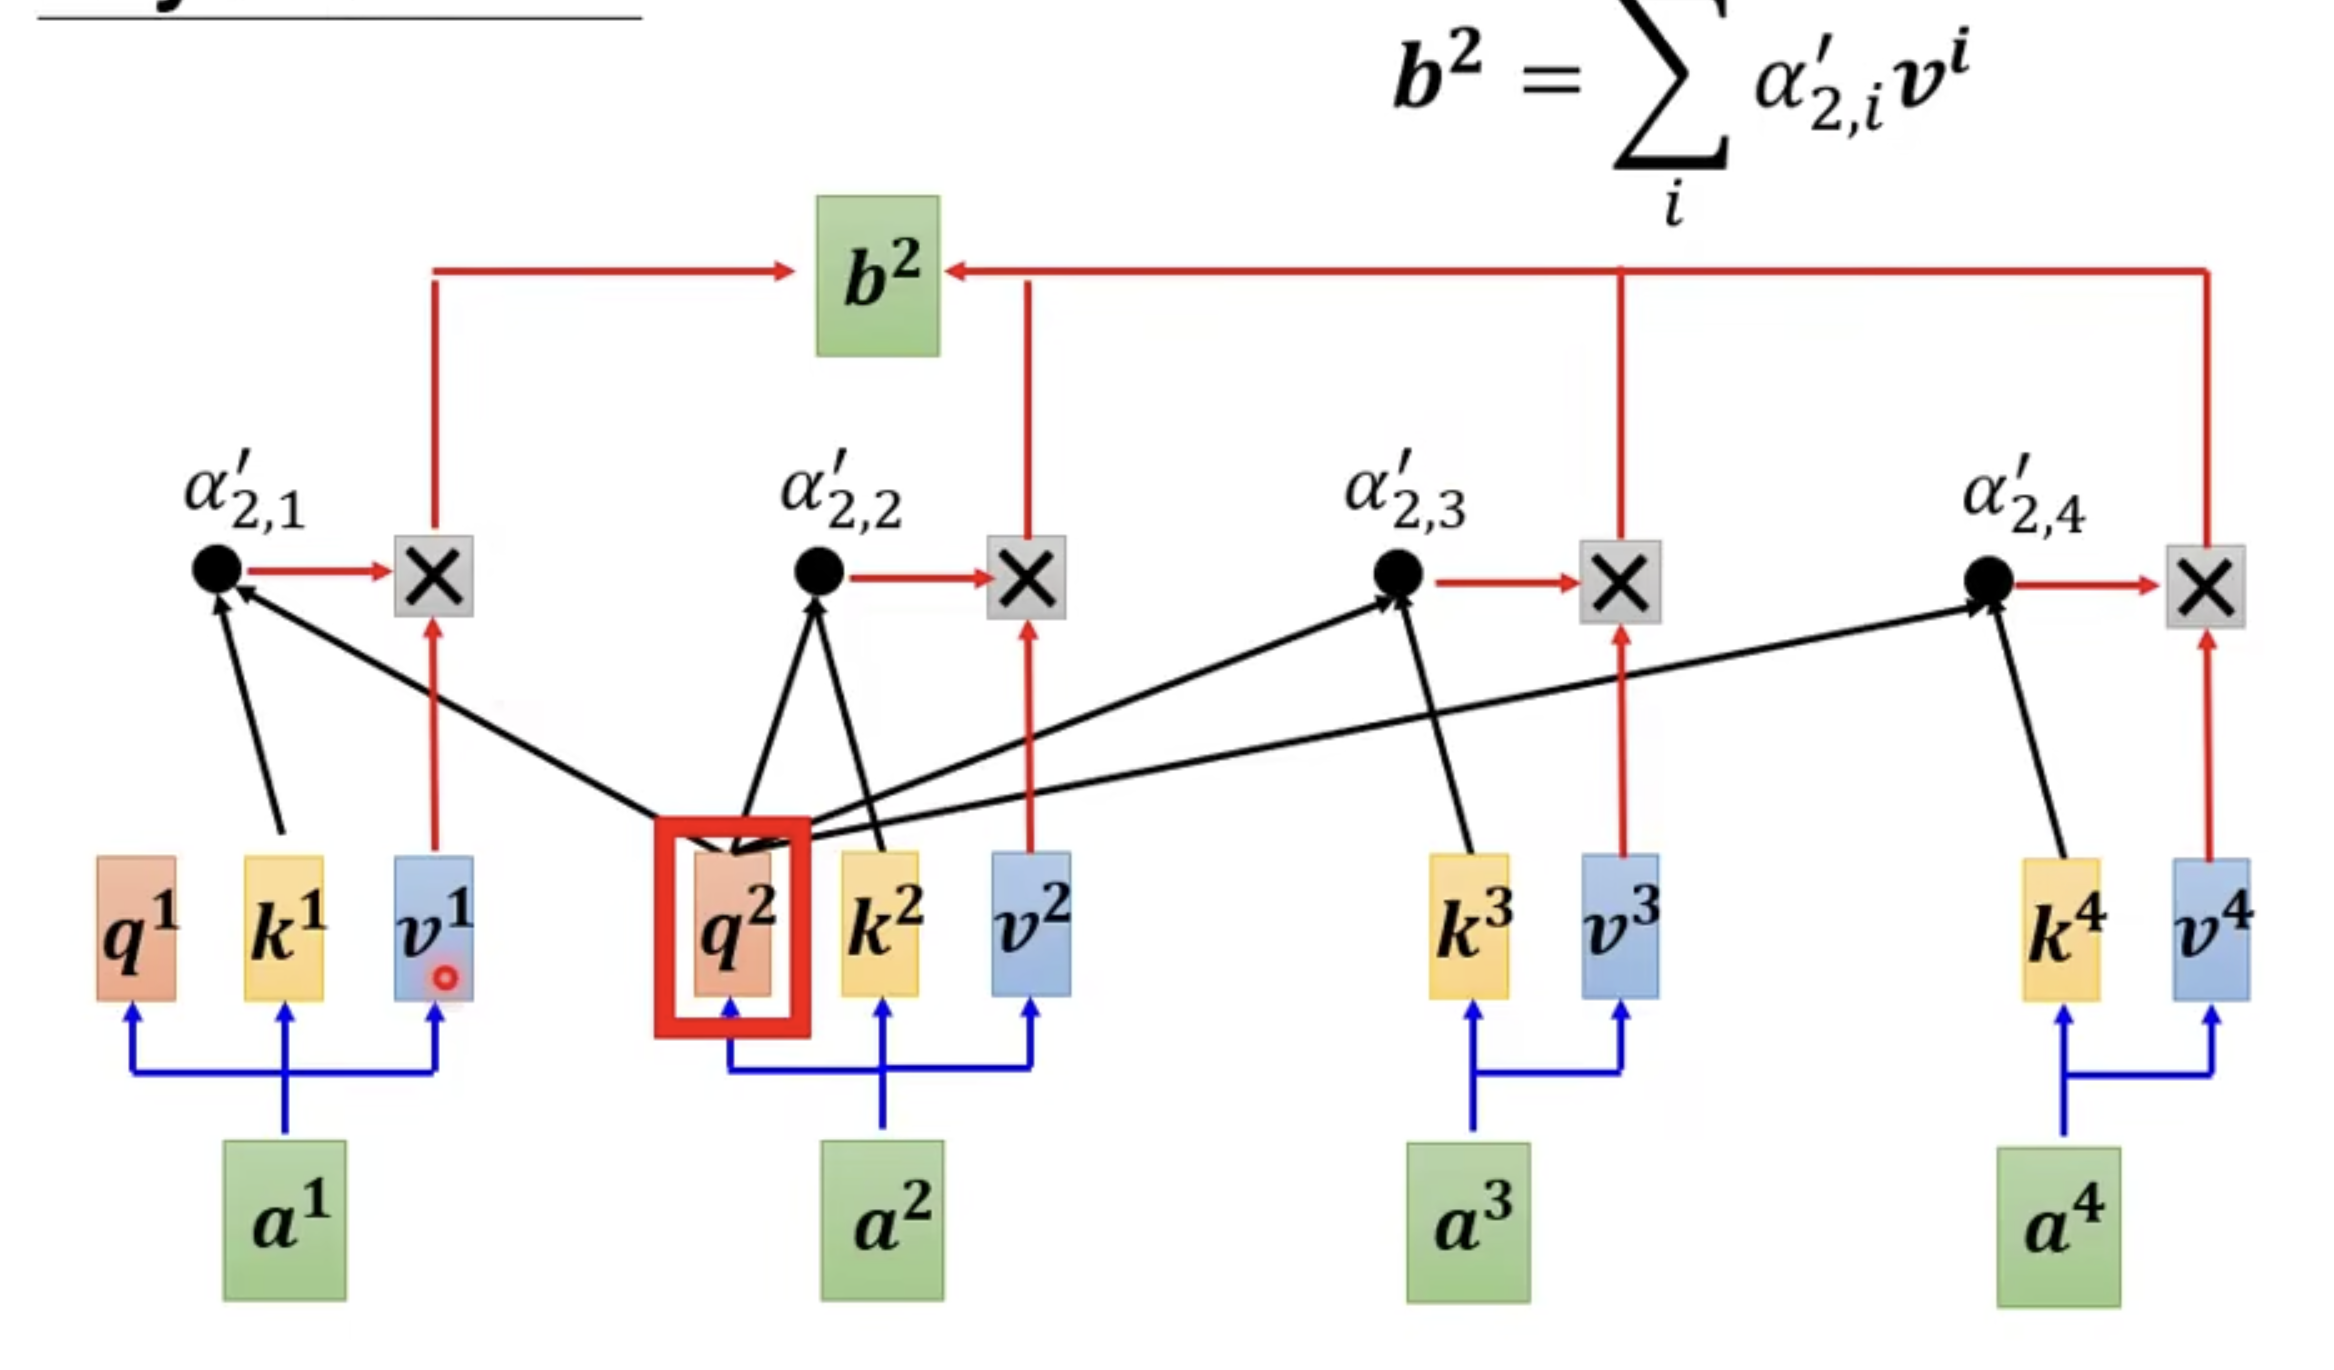

#### **Q7.2** Explain how the encoder and the decoder interact in the Transformer we saw in class.

***\[ answer the question in your own words, but do not use more than ~100 words \]***

your answers here

<br>

---

<br>

## **Question 8** [15 points]

#### **Q8.1** Write custom dataset class that:

- Gets a sample from CelebA available from `torchvision`. Here is the link to the documentation: https://pytorch.org/vision/stable/generated/torchvision.datasets.CelebA.html

- Removes a squared block of the sample at a random location. *\[You want to generate images like the ones in figure-1 b) in this publication https://arxiv.org/pdf/1801.07939 (just given as a reference to what you are trying to achieve, no need to read anything from the paper here).\]*

- Returns the corrupted image as the input and the original image as the target.

Download the data with `torchvision`, and resize the images to have dimension 224 x 224.  Use one of the two templates$^1$ below as a starting point, and add any methods, code, or arguments you deem necessary. 

$^1$ your custom class can either inherit from the ``CelebA`` class or from the ``Dataset`` class, you can choose which one you prefer to use.



In [ ]:
from torchvision.datasets import CelebA
import torchvision
from torchtoolbox.transform import Cutout
import os
from PIL import Image
class CorruptedCelebA(CelebA):
    def __init__(self, path = 'MNIST'):
     
        self.path = path
        self.data = os.listdir(self.path)
        self.transform = torchvision.transforms.Compose(
            [torchvision.transforms.Resize(224,224),
            Cutout(0.5),
            torchvision.transforms.ToTensor()]
        )
        self.transform2 = torchvision.transforms.Compose(
            [torchvision.transforms.Resize(224, 224),
             torchvision.transforms.ToTensor()]
        )

        self.len = len(self.data)


    def __getitem__(self, index):
        image_index = self.data[index]
        img_path = os.path.join(self.path, image_index)
        img = Image.open(img_path)
        ori_img =  self.transform2(img)
        per_img = self.transform(img)


        return ori_img, per_img

In [ ]:
### you can use this provided code in this cell or the one
### in the cell above (only use one of the two). 
### Modify it as you see fit to produce what the question asks

class CorruptedCelebA(Dataset):
    def __init__(self, data, crop_size=80, **kwargs):
        super().__init__(**kwargs)
        self.crop_size = crop_size
        self.data = data

    def __getitem__(self, idx):
        img, _ = self.data[idx]
        ### your code here
        return corrupted_img, img
    
    def __len__(self):
        return ### your code here

#### **Q8.2** Plot 32 of these samples and their corresponding targets.

In [ ]:
### your code here

#### **Q8.3** From the list below, choose two transforms that could help improve the generalisation of a model, and two that would damage its performance. Briefly discuss each of these transforms and how you think it would influence the model.

- `torchvision.transforms.CenterCrop()`
- `torchvision.transforms.Grayscale()`
- `torchvision.transforms.RandomAffine()`
- `torchvision.transforms.RandomHorizontalFlip()`
- `torchvision.transforms.RandomRotation()`
- `torchvision.transforms.RandomVerticalFlip()`
- `torchvision.transforms.GaussianBlur()`